In [104]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/src')
import process
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/riffusion-inference')
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.riffusion_pipeline import RiffusionPipeline
from riffusion.datatypes import InferenceInput
pipe = RiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1")
pipe = pipe.to("cuda")
ref_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/reference.npy", mmap_mode='r')
im_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/imitations.npy", mmap_mode='r')
Audio(im_data[1003], rate=44100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [120]:
harmonic_gate = process.gen_harmonic_spectrogram(im_data[1003])
noise_gate = process.gen_gated_spectrogram(im_data[1003], 0.001)
mask_image, _ = process.image_from_spectrogram(harmonic_gate + noise_gate)

Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


In [129]:
Audio(ref_data[1003], rate=44100)

In [128]:
mask_image[mask_image>0] = 255

TypeError: '>' not supported between instances of 'Image' and 'int'

In [125]:
init_image, max_value = process.waveform_to_image(im_data[1003])
out_image = pipe.riffuse_mason("Flute",
                           init_image=init_image,
                           mask_image = None,
                           num_inference_steps=50,
                            negative_prompt="Voice",
                            )[0]
wave_out = process.image_to_waveform(out_image, max_value)
Audio(wave_out, rate=44100)

  0%|          | 0/38 [00:00<?, ?it/s]

In [103]:
out_image.save("output.pdf")

In [101]:
init_image.save("Initial.pdf")

In [33]:
np.array(harmonic_mask_image).shape

(512, 576, 3)

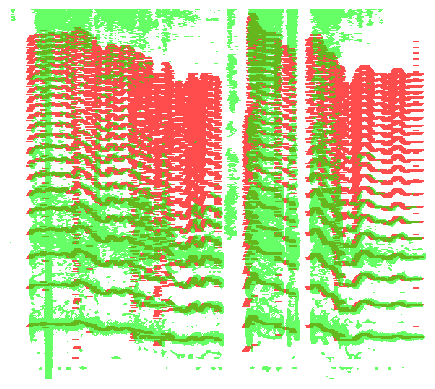

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def overlay_spectrograms(harmonic_image, noise_image):
    # Convert the images to RGBA format
    harmonic_rgba = np.dstack((harmonic_image[...,0], np.zeros_like(harmonic_image[...,0]), np.zeros_like(harmonic_image[...,0]), harmonic_image[...,0]))
    noise_rgba = np.dstack((np.zeros_like(noise_image[...,0]), noise_image[...,0], np.zeros_like(noise_image[...,0]), noise_image[...,0]))
    
    # Normalize the images to range [0, 1]
    harmonic_rgba = harmonic_rgba / np.max(harmonic_rgba)
    noise_rgba = noise_rgba / np.max(noise_rgba)
    
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the harmonic image
    ax.imshow(harmonic_rgba, cmap='Reds', alpha=0.7, interpolation='none')

    # Plot the noise image
    ax.imshow(noise_rgba, cmap='Greens', alpha=0.6, interpolation='none')

    # Set axis off and display the plot
    ax.axis('off')
    plt.savefig("Masks.pdf", bbox_inches='tight')
    plt.show()


noise_gate = process.gen_gated_spectrogram(im_data[1003], 0.0015)

harmonic_mask_image, _ = process.image_from_spectrogram(harmonic_gate)
noise_mask_image, _ = process.image_from_spectrogram(noise_gate)

overlay_spectrograms(np.array(harmonic_mask_image), np.array(noise_mask_image))

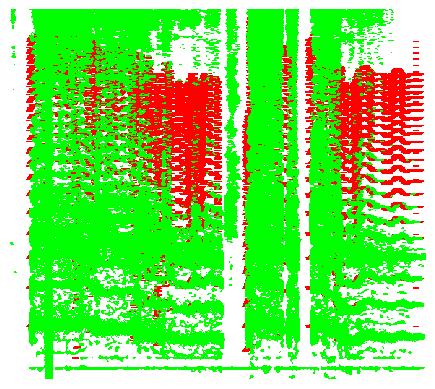

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def overlay_spectrograms(harmonic_image, noise_image):
    # Ensure the images are numpy arrays
    harmonic_image = np.asarray(harmonic_image)
    noise_image = np.asarray(noise_image)

    # Convert the images to RGBA format
    harmonic_rgba = np.zeros((*harmonic_image.shape, 4))
    noise_rgba = np.zeros((*noise_image.shape, 4))

    harmonic_rgba[..., 0] = harmonic_image  # Red channel
    harmonic_rgba[..., 3] = harmonic_image  # Alpha channel
    
    noise_rgba[..., 1] = noise_image  # Green channel
    noise_rgba[..., 3] = noise_image  # Alpha channel
    
    # Normalize the images to range [0, 1]
    harmonic_rgba = harmonic_rgba / np.max(harmonic_rgba)
    noise_rgba = noise_rgba / np.max(noise_rgba)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the harmonic image
    ax.imshow(harmonic_rgba, interpolation='none')

    # Plot the noise image
    ax.imshow(noise_rgba, interpolation='none')

    # Set axis off and display the plot
    ax.axis('off')
    plt.show()

# Assuming harmonic_mask_image and noise_mask_image are PIL images
harmonic_mask_image = np.array(harmonic_mask_image)
noise_mask_image = np.array(noise_mask_image)

overlay_spectrograms(harmonic_mask_image[...,0], noise_mask_image[...,0])

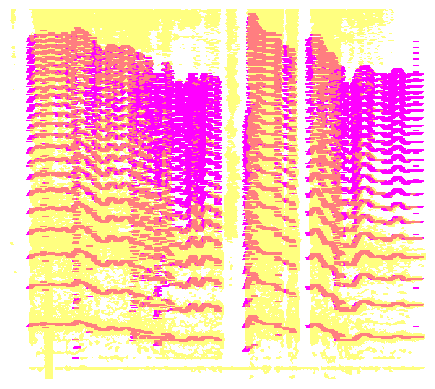

In [69]:
import matplotlib.pyplot as plt
import numpy as np

harmonic_mask_image, _ = process.image_from_spectrogram(harmonic_gate)
noise_mask_image, _ = process.image_from_spectrogram(noise_gate)
def overlay_spectrograms(harmonic_image, noise_image):
    # Convert the images to RGBA format
    
    harmonic_rgba = np.dstack((harmonic_image[...,0], np.zeros_like(harmonic_image[...,0]), harmonic_image[...,0], harmonic_image[...,0]))
    noise_rgba = np.dstack((noise_image[...,0], noise_image[...,0], np.zeros_like(noise_image[...,0]), noise_image[...,0]))
    
    # Normalize the images to range [0, 1]
    harmonic_rgba = harmonic_rgba / np.max(harmonic_rgba)
    noise_rgba = noise_rgba / np.max(noise_rgba)
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the harmonic image with a purple colormap
    ax.imshow(harmonic_rgba, cmap='BuGn', alpha=1.0, interpolation='none')
    
    # Plot the noise image with an orange colormap
    ax.imshow(noise_rgba, cmap='Blues', alpha=0.5, interpolation='none')
    
    # Set axis off and display the plot
    ax.axis('off')
    plt.show()

overlay_spectrograms(np.array(harmonic_mask_image), np.array(noise_mask_image))


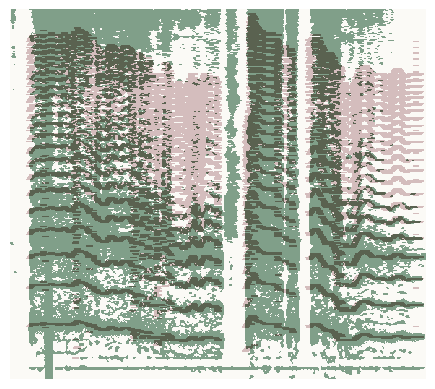

In [92]:
def overlay_spectrograms(harmonic_image, noise_image):
    # Normalize the images to range [0, 1]
    harmonic_image = harmonic_image / np.max(harmonic_image)
    noise_image = noise_image / np.max(noise_image)
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the harmonic image with a BuGn colormap
    ax.imshow(harmonic_image[...,0], cmap='Reds', alpha=0.5, interpolation='none')
    
    # Plot the noise image with a Blues colormap
    ax.imshow(noise_image[...,0], cmap='Greens', alpha=0.5, interpolation='none')
    
    # Set axis off and display the plot
    ax.axis('off')
    plt.show()

overlay_spectrograms( np.array(harmonic_mask_image), np.array(noise_mask_image))

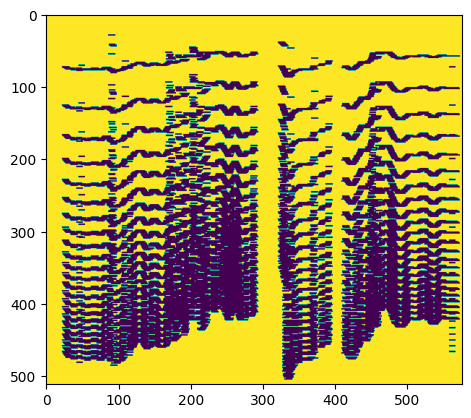

In [90]:
plt.imshow(harmonic_gate)

In [91]:
harmonic_gate.shape

(512, 576)

In [ ]:
ref_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/reference.npy", mmap_mode='r')
im_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/imitations.npy", mmap_mode='r')


trai

In [107]:
valid_indices = np.arange(1, 2825, 10)

In [109]:
len(valid_indices)

283

In [113]:
errors = []

for valid_index in valid_indices:

    init_image, max_value = process.waveform_to_image(im_data[valid_index])
    harmonic_gate = process.gen_harmonic_spectrogram(im_data[valid_index])
    noise_gate = process.gen_gated_spectrogram(im_data[valid_index], 0.001)
    mask_image, _ = process.image_from_spectrogram(harmonic_gate + noise_gate)

    out_image = pipe.riffuse_mason("",
                               init_image=init_image,
                               mask_image = mask_image,
                               num_inference_steps=50,
                                negative_prompt="Voice",
                                )[0]
    out_spec = process.spectrogram_from_image(out_image, max_value)

    ref_spec = process.spectrogram_from_waveform(ref_data[valid_index])[...,:576]
    
    errors.append(np.mean(ref_spec-out_spec)**2)
    print(f"Mean{np.mean(errors)}")
    print(valid_index)
    

Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean26.829498500683258
1
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean69.8013980159617
11
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean46.53532203326751
21
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean36.19291406049002
31
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean30.39117631812325
41
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean25.874541251370676
51
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean48.68928768071679
61
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean55.368863674513705
71
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean63.91680111198538
81
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean57.586551788621406
91
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean55.98545594818268
101
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean51.869056379488406
111
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean53.49835107040592
121
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean49.72151294232828
131
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean57.91730080178916
141
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean63.51164465402874
151
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean69.57647905481797
161
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean66.05182108365784
171
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean62.62503229427786
181
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean61.87252740429833
191
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean58.98163457462928
201
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean58.01531573401176
211
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean55.611764697440556
221
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean53.58056727145006
231
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean51.45326649773236
241
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean49.768499930741925
251
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean48.09523742117916
261
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean48.383917610549354
271
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean46.77739355595886
281
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean60.80669039638427
291
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean59.93480986248241
301
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean59.39134750580479
311
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean57.66821459237848
321
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean56.65320204844951
331
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean85.8610368996939
341
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean134.49920595788774
351
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean160.88596193590396
361
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean281.6825596171867
371
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean275.673994394662
381
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean268.7881045619959
391
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean262.3222486409042
401
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean256.1290917768446
411
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean250.2330641518754
421
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean244.6653970724907
431
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean239.8976649647886
441
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean234.82034197239977
451
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean235.55829705209396
461
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean230.6511783895642
471
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean232.72626555195808
481
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean228.6278068345632
491
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean224.45542422120053
501
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean220.34143878348726
511
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean216.5805800311571
521
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean212.57170637263593
531
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean208.9174622179607
541
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean205.18923370901373
551
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean202.2535777359363
561
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean199.04884815618058
571
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean195.73955363763739
581
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean192.7905255588038
591
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean189.7742954029243
601
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean188.75006035821806
611
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean186.78912064856883
621
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean183.9580432683482
631
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean181.15517265416327
641
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean178.43665313840378
651
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean175.78405054868807
661
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean173.20195977444646
671
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean171.33510768333375
681
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean169.31588037105587
691
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean169.01642099723105
701
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean169.35591699532992
711
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean167.05420940624825
721
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean164.8363299902345
731
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean162.84800434557442
741
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean160.70547630758549
751
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean159.02595578365455
761
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean157.02351648690367
771
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean155.20703549492615
781
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean153.26717517681257
791
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean151.91654557448123
801
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean150.06454367488413
811
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean148.2583282456069
821
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean146.6786960001386
831
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean145.0809654951146
841
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean144.35584224060796
851
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean142.7018179697324
861
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean141.2988818026203
871
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean143.56834203506895
881
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean142.65761665693157
891
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean141.0913823663533
901
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean140.16085997933712
911
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean138.82695361108128
921
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean137.3503703897379
931
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean135.94223911151863
941
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean134.54952627769887
951
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean133.9541049153426
961
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.84082884811383
971
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean131.50253751452928
981
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean130.5286595024354
991
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.25165681197728
1001
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.03707321394634
1011
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.69351746251968
1021
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.41862896074156
1031
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean131.57667393408647
1041
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean130.3414605267796
1051
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.23176207701997
1061
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.83287813832894
1081
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.8395514421426
1091
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean127.77996602178406
1101
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean126.65224820703345
1111
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean125.5793824895505
1121
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean124.49059310536147
1131
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean123.4163154033838
1141
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean122.3691229259587
1151
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean121.32335356457972
1161
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean120.41019349087098
1171
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean119.44998815275667
1181
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean118.53164349058258
1191
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean117.70441966786254
1201
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean116.75708985560094
1211
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean116.12139389908941
1221
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean115.1853280183371
1231
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean114.31601478695423
1241
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean114.65972979196529
1251
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean115.3964574169335
1261
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean114.67858213794685
1271
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean114.4365082596188
1281
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean113.93017195372217
1291
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean113.07913214682176
1301
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean112.23609808601873
1311
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean111.45280929640383
1321
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean110.64176420876883
1331
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean109.8834608384176
1341
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean120.69657126880132
1351
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.7575320641262
1361
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.8323920028941
1371
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.7852904932825
1381
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.31840091993072
1391
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.85704099028416
1401
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean133.4386484435419
1411
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean135.13893682182965
1421
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean134.24273540350538
1431
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean133.34364099855136
1441
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean133.92098894264603
1451
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean133.01146146045681
1461
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.18114240986355
1471
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean131.639292853255
1481
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean130.81477320496464
1491
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.95750293501717
1501
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.94972748926725
1511
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.6410473138596
1521
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.44430117784103
1531
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.16019864098348
1541
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.71036295706602
1551
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.78080750572005
1561
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.11677078787892
1571
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.63459057697588
1581
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean131.83354047568105
1591
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean132.13150398266598
1601
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean131.389084106331
1611
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean130.65649637987826
1621
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.85982922478047
1631
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.52680752637613
1641
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean129.18241408442043
1651
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean128.58974215957866
1661
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean127.87223814422453
1671
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

Mean127.1791281583044
1681
Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

KeyboardInterrupt: 

# yurh

In [118]:
valid_index = 1003
init_image, max_value = process.waveform_to_image(im_data[valid_index])
harmonic_gate = process.gen_harmonic_spectrogram(im_data[valid_index])
noise_gate = process.gen_gated_spectrogram(im_data[valid_index], 0.001)
mask_image, _ = process.image_from_spectrogram(harmonic_gate + noise_gate)
out_image = pipe.riffuse_mason("Trumpet",
                           init_image=init_image,
                           mask_image = mask_image,
                           num_inference_steps=50,
                            negative_prompt="Voice",
                            )[0]
wave_out = process.image_to_waveform(out_image, max_value)
Audio(wave_out, rate=44100)

Residual symmetry: P:5834.583984  N:5736.967773  MEAN:29.311102
Inverting signal


  0%|          | 0/38 [00:00<?, ?it/s]

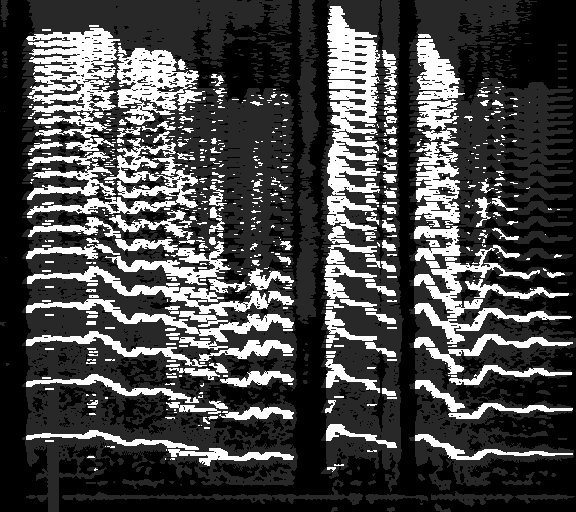

In [119]:
mask_image

In [117]:
Audio(ref_data[1003], rate=44100)